In [1]:
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import re
import numpy as np
import seaborn as sn
## for the stats class
import scipy.signal as sg
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.decomposition import SparsePCA
import pywt
from scipy import stats

In [2]:
##ASOS data
asos = pd.read_csv("/home/smmrrr/Fog_Imaging_Project/oregon_asos.csv")
asos['valid'] = pd.to_datetime(asos['valid'])
asos['day'] = asos.valid.dt.date
##downloaded from https://mesonet.agron.iastate.edu/request/download.phtml?network=CA_ASOS

/tmp/ipykernel_203701/3544470708.py:2: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  asos = pd.read_csv("/home/smmrrr/Fog_Imaging_Project/oregon_asos.csv")


In [3]:
# pd.to_datetime(asos['valid']).describe(datetime_is_numeric=True)
## oregon locations

# Collocated with ASOS stations
# Agate Beach (44.66, -124.06)
# Cannon Beach (45.90, 123.97)
# Otter Rock (44.74, -124.06)
# Pacific City (45.22, -123.97)
# Lincoln City (44.98, -124.02)
# Beverly (44.72, -124.06)

##oregon data table

surfline = pd.DataFrame({
'Site Name': ['Agate Beach', 'Cannon Beach', 'Otter Rock', 'Pacific City', 'Lincoln City', 'Beverly','Yaquina Head']
 , 'lat': [44.66, 45.90, 44.74, 45.22, 44.98, 44.72,44.676]
    ,'lon': [-124.06,
 -123.97,
-124.06,
-123.97,
-124.02,
-124.06, -124.0797]
})
surfline['Source'] = 'Surfline'
surfline.loc[surfline['Site Name']== 'Yaquina Head', 'Source'] = 'Holman Site'
surfline

,Site Name,lat,lon,Source
0,Agate Beach,44.660,-124.0600,Surfline
1,Cannon Beach,45.900,-123.9700,Surfline
2,Otter Rock,44.740,-124.0600,Surfline
3,Pacific City,45.220,-123.9700,Surfline
4,Lincoln City,44.980,-124.0200,Surfline
5,Beverly,44.720,-124.0600,Surfline
6,Yaquina Head,44.676,-124.0797,Holman Site


In [4]:
##RU = (45.99190, -123.39365)
##LU = (45.991898, -124.563695)
##RB = (44.51873, -123.38816)
##LB = (44.530479, -124.569188)
asos.loc[1]

station                                                            ONP
valid                                              1949-08-01 09:00:00
lon                                                          -124.0579
lat                                                            44.5804
elevation                                                         48.0
tmpf                                                             55.04
dwpf                                                             51.98
relh                                                              89.4
drct                                                              70.0
sknt                                                               5.0
p01i                                                               NaN
alti                                                             30.05
mslp                                                               NaN
vsby                                                              15.0
gust  

In [5]:
asos_coords = asos.loc[asos['valid'] >= '2023-01-01'][["lat", "lon", "station"]].groupby(["lat", "lon", "station"]).first()
asos_coords = asos_coords.reset_index()
asos_coords['Site Name'] = 'ASOS Station ' + asos_coords['station']
asos_coords['Source'] = 'ASOS'
asos_coords

,lat,lon,station,Site Name,Source
0,44.5804,-124.0579,ONP,ASOS Station ONP,ASOS
1,45.4182,-123.8144,TMK,ASOS Station TMK,ASOS


In [6]:
plot_data = pd.concat([surfline, asos_coords[['Site Name','lat', 'lon', 'Source']]])
plot_data

,Site Name,lat,lon,Source
0,Agate Beach,44.6600,-124.0600,Surfline
1,Cannon Beach,45.9000,-123.9700,Surfline
2,Otter Rock,44.7400,-124.0600,Surfline
3,Pacific City,45.2200,-123.9700,Surfline
4,Lincoln City,44.9800,-124.0200,Surfline
5,Beverly,44.7200,-124.0600,Surfline
6,Yaquina Head,44.6760,-124.0797,Holman Site
0,ASOS Station ONP,44.5804,-124.0579,ASOS
1,ASOS Station TMK,45.4182,-123.8144,ASOS


In [7]:
import matplotlib.image as mpimg
or_map1=mpimg.imread('/home/smmrrr/Fog_Imaging_Project/ESIP_Proposal/OR_map_nonames.png')


In [11]:
##phenocam

# phenocam = pd.DataFrame({'lat': [37.4020, 41.6000, 37.9964], 'lon': [-122.2210,-124.1000,-123.0211 ], 
#                          'type': ['Phenocam','Phenocam','Phenocam'], 'n_days': [8447,1070,6631], 'fog_percent':[0,0,0]})



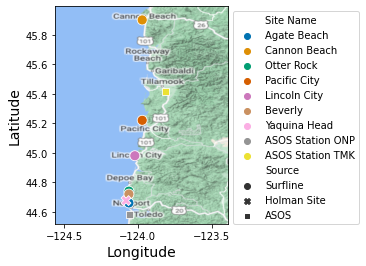

<Figure size 1080x576 with 0 Axes>

In [23]:
# ax = surfline.plot(kind="scatter", x="lon", y="lat",
#     s=30,
#     c="names" #, cmap=plt.get_cmap("cool"), label = 'Airport'
#     ,colorbar=True, figsize=(10,7),
# )
import seaborn as sns
ax = sns.scatterplot(x = 'lon', y = 'lat', data=plot_data
                , hue='Site Name', style='Source', s = 100, palette = 'colorblind')

# ax.scatter(phenocam['lon'], phenocam['lat'], marker='^', c=phenocam["n_years"], cmap=plt.get_cmap("cool"), label='Phenocam')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))                   
plt.imshow(or_map2, extent=[-124.563695, -123.38816, 44.51873, 45.991898], alpha=0.9, cmap='brg')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.xticks([-124.5, -124, -123.5])
# plt.title("Figure 1: Locations of Image Data Sites and ASOS Stations")
plt.figure(figsize=(15,8))
# plt.legend()
# save_fig("Percent of Hours with Fog")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


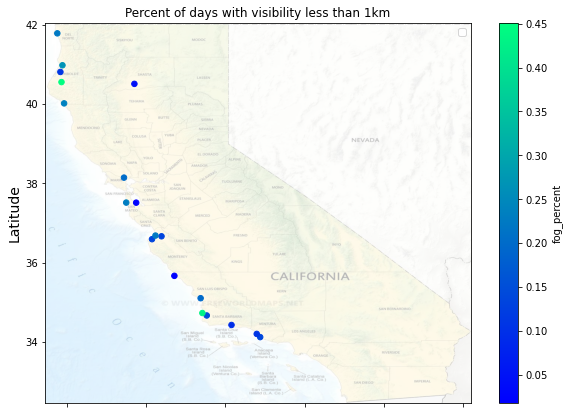

In [35]:
ax = fog_summary.plot(kind="scatter", x="lon", y="lat",
    s=30,
    c="fog_percent", cmap=plt.get_cmap("winter"),
    colorbar=True, figsize=(10,7),
)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.3, cmap='brg')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Percent of days with visibility less than 1km")
plt.legend()
# save_fig("Percent of Hours with Fog")
plt.show()

In [21]:
markers = ['o', '^']
for name, group in groups:   
    for x in group.values:
        print(x)
        if x[2] == 'Airport':
            ax.plot(x[2], x[1], marker='o', linestyle='', ms=12)
        else:
            ax.plot(x[1], x[1], marker='x', linestyle='', ms=12)  

[34.12 -119.12 'Airport' 27803 0.13586211869906972 76.17260273972603]
[34.2008 -119.2072 'Airport' 25634 0.10570867751697063 70.23013698630137]
[34.4261 -119.8436 'Airport' 27133 0.09601364314645065 74.33698630136986]
[34.6656 -120.4675 'Airport' 11367 0.14611455673112003 31.14246575342466]
[34.7275 -120.5783 'Airport' 2461 0.4306930693069307 6.742465753424658]
[35.1015 -120.6224 'Airport' 1671 0.1977886977886978 4.578082191780822]
[35.6656 -121.2847 'Airport' 11780 0.0171558202183468 32.273972602739725]
[36.5904 -121.8488 'Airport' 27407 0.13506985731272295 75.08767123287672]
[36.6635 -121.6093 'Airport' 27133 0.13409344404511092 74.33698630136986]
[36.6815 -121.7617 'Airport' 831 0.22264631043256997 2.276712328767123]
[37.5119 -122.2483 'Airport' 14473 0.02188563885221983 39.652054794520545]
[37.5136 -122.4996 'Airport' 4780 0.22944758590691605 13.095890410958905]
[38.1436 -122.5561 'Airport' 5619 0.2003213711837172 15.394520547945206]
[40.0167 -124.0667 'Airport' 12595 0.23705552089

In [ ]:
##holdman + surfline

surfline = 